# Importing Important Libraries

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
physical_devices=tf.config.experimental.list_physical_devices('GPU')
print(f"Number OF GPU:{len(physical_devices)}")
tf.config.experimental.set_memory_growth(physical_devices[0],True)

Number OF GPU:1


# Organising the Data within the file

In [17]:
#Organise the data into train test and validation folders
dir_=['saree','jeans','trouser']
os.chdir(r"C:\Users\acer\Desktop\images")
if os.path.isdir('train/0/') is False:
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')
    for i in dir_:
        shutil.move(f'{i}','train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')
        
        valid_samples=random.sample(os.listdir(f'train/{i}'),16)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}',f'valid/{i}')
            
        test_samples=random.sample(os.listdir(f'train/{i}'),20)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}',f'test/{i}')
os.chdir('../..')

In [22]:
train_path = r'C:\Users\acer\Desktop\images\train'
test_path = r'C:\Users\acer\Desktop\images\test'
validation_path = r'C:\Users\acer\Desktop\images\valid'

In [36]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path,target_size=(224,224),batch_size=10)
valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=validation_path,target_size=(224,224),batch_size=10)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path,target_size=(224,224),batch_size=10,shuffle=False)

Found 1177 images belonging to 3 classes.
Found 48 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


# Modify Model

In [46]:
mobilenet=tf.keras.applications.mobilenet.MobileNet()

In [47]:
mobilenet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [48]:
x=mobilenet.layers[-1].output
output=Dense(units=3,activation='softmax')(x)

In [49]:
model = Model(inputs=mobilenet.input,outputs=output)

In [50]:
for layer in model.layers[:-23]:
    layer.trainable=False

In [51]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

# Training The Model

In [52]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=30,verbose=2)

Epoch 1/30
118/118 - 16s - loss: 1.0461 - accuracy: 0.8598 - val_loss: 1.0441 - val_accuracy: 0.7500 - 16s/epoch - 134ms/step
Epoch 2/30
118/118 - 2s - loss: 1.0058 - accuracy: 0.9533 - val_loss: 1.0007 - val_accuracy: 0.9167 - 2s/epoch - 17ms/step
Epoch 3/30
118/118 - 2s - loss: 0.9864 - accuracy: 0.9694 - val_loss: 0.9775 - val_accuracy: 0.9792 - 2s/epoch - 16ms/step
Epoch 4/30
118/118 - 2s - loss: 0.9707 - accuracy: 0.9737 - val_loss: 0.9734 - val_accuracy: 0.9167 - 2s/epoch - 14ms/step
Epoch 5/30
118/118 - 2s - loss: 0.9547 - accuracy: 0.9822 - val_loss: 0.9480 - val_accuracy: 0.9792 - 2s/epoch - 20ms/step
Epoch 6/30
118/118 - 2s - loss: 0.9407 - accuracy: 0.9822 - val_loss: 0.9338 - val_accuracy: 0.9792 - 2s/epoch - 18ms/step
Epoch 7/30
118/118 - 3s - loss: 0.9258 - accuracy: 0.9864 - val_loss: 0.9272 - val_accuracy: 0.9792 - 3s/epoch - 23ms/step
Epoch 8/30
118/118 - 2s - loss: 0.9118 - accuracy: 0.9898 - val_loss: 0.9078 - val_accuracy: 0.9792 - 2s/epoch - 16ms/step
Epoch 9/30
11

## Predict the Clothing

In [55]:
test_labels=test_batches.classes

In [56]:
prediction = model.predict(x=test_batches,verbose=0)

In [58]:
cm = confusion_matrix(y_true=test_labels,y_pred=prediction.argmax(axis=1))

In [59]:
test_batches.class_indices

{'jeans': 0, 'saree': 1, 'trouser': 2}

In [66]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    if normalize:
        cm=cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix")
    print(cm)
    
    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
            horizontalalignment='center',
            color='white' if cm[i,j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicterd Label")

Confusion Matrix
[[19  0  1]
 [ 0 20  0]
 [ 0  0 20]]


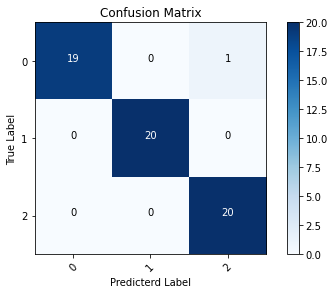

In [67]:
cm_plot=['0','1','2']
plot_confusion_matrix(cm=cm,classes=cm_plot)

# Saving Our Model

In [69]:
import os.path
if os.path.isfile(r'C:\Users\acer\Desktop\Internship\Project\Image-Scraping-and-Classification-Project--3-/ImageClassificationModel.h5') is False:
    model.save(r'C:\Users\acer\Desktop\Internship\Project\Image-Scraping-and-Classification-Project--3-/ImageClassificationModel.h5')